In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Compile permits data

In [104]:
p_16 = pd.read_csv('../data/permits/permit_2016.csv')
p_17 = pd.read_csv('../data/permits/permit_2017.csv')
p_18 = pd.read_csv('../data/permits/permit_2018.csv')
p_19 = pd.read_csv('../data/permits/permit_2019.csv')
p_20 = pd.read_csv('../data/permits/permit_2020_tillMay.csv')

2020 data is different in format; match 2020 with previous years

In [105]:
p_20.columns = ['Status', 'Score','Match_type','X', 'Y', 'PermitNum','Permit_Type','USER_Permit_Groups',
               'PermitDate','Address','Zip_Code','Contractor','Value', 'Area', 'Work_Description','Land_Use',
                'City','State','tract']

In [106]:
p_20['PermitDate']= pd.to_datetime(p_20['PermitDate']) 

In [107]:
p_20['PermitYear'] = p_20['PermitDate'].dt.year

Concat permits data across different years

In [108]:
col_merge =  list(set(p_17.columns).intersection(set(p_20.columns)))

In [109]:
permit_16_20 = pd.concat([p_16[col_merge],p_17[col_merge],p_18[col_merge],p_19[col_merge],p_20[col_merge]], axis = 0)

In [111]:
permit_16_20.to_csv('../data/permits/permits_data_from_2016_to_202005.csv',index=False)

In [110]:
permit_16_20.head()

,Value,X,Permit_Type,Status,tract,PermitDate,Y,Area,Work_Description,Address,Contractor,Score,PermitNum,Land_Use,PermitYear,Zip_Code
0,250.0,2.495071e+06,Backflow (BF) Commercial Alteration,M,4.811300e+10,2016/11/29 00:00:00,6.987827e+06,NaN,BACKFLOW TEST(S),4830 MCKINNEY AVE,"DELUDE, CHERIE (469) 899-6050 150 EAST HIGHWAY...",90.92,1611295008,RESTAURANT WITHOUT DRIVE-IN SERVICE,2016,75205.0
1,NaN,2.492412e+06,Barricade (BA) Commercial Alteration,M,4.811300e+10,2016/01/05 00:00:00,6.971517e+06,NaN,W30273 START 12/16/15@9AM END 2/16/16@4PM,1933 MAIN ST,SANDHU MANAGEMENT & INVESTMENT (214) 881-9977 ...,90.92,1601041066,STREET BARRICADE,2016,75201.0
2,NaN,2.490124e+06,Barricade (BA) Commercial Alteration,M,4.811300e+10,2016/01/06 00:00:00,6.977166e+06,NaN,W30361 START 10/31/15@7AM END4/30/16@7PM,2622 HOWLAND ST,HUNT CONSTRUCTION GROUP (972) 788-1000 4099 MC...,90.92,1601061053,SIDEWALK BARRICADE,2016,75204.0
3,NaN,2.490124e+06,Barricade (BA) Commercial Alteration,M,4.811300e+10,2016/01/06 00:00:00,6.977166e+06,NaN,W30358 START 10/31/15@7AM END4/30/16@7PM,2622 HOWLAND ST,HUNT CONSTRUCTION GROUP (972) 788-1000 4099 MC...,90.92,1601061058,STREET BARRICADE,2016,75204.0
4,NaN,2.488839e+06,Barricade (BA) Commercial Alteration,M,4.811300e+10,2016/01/05 00:00:00,6.971474e+06,NaN,W#30330 CLOSURE BEGINS 1/2/16 9AM ENDS 1/9/16 ...,1701 N MARKET ST Ste:110,"MCLEAN MECHANICAL CONTRACTORS, INC (214) 823-7...",90.92,1601051051,STREET BARRICADE,2016,75202.0


### read permit

Read permits data after addresses are normalized in R

In [3]:
add_permit = pd.read_csv('../data/permits/permits_data_from_2017_to_202005_norm_address.csv')

/Users/tengye/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
add_permit.columns

Index(['tract', 'Contractor', 'Y', 'Address', 'PermitYear', 'Zip_Code',
       'PermitDate', 'Score', 'Status', 'Permit_Type', 'Land_Use', 'PermitNum',
       'Area', 'Work_Description', 'X', 'Value', 'originalDfAddress',
       'dfStreetNumber', 'dfStreetName', 'dfApartmentNumber',
       'treatedDfAddress'],
      dtype='object')

In [4]:
perm_cols = ['tract', 'PermitYear', 'Zip_Code','treatedDfAddress','Status'] #'PermitDate', #'Permit_Type', 

#### Without 2020 data

In [151]:
add_permit_till_2019 = add_permit[add_permit.PermitDate<='2020-01-01']

In [152]:
add_permit_till_2019_grp = add_permit_till_2019[perm_cols].groupby(['tract','PermitYear', 'Zip_Code','treatedDfAddress']).count().reset_index(
                            ).rename(columns={'Status':'Permit_count'})

In [153]:
add_permit_till_2019_grp['Year_permit'] = add_permit_till_2019_grp.PermitYear.apply(lambda x: int(str(x)[2:4]))

In [154]:
add_permit_till_2019_grp['Year_permit_next_y'] = add_permit_till_2019_grp['Year_permit'] + 1

#### With 2020 data updated

In [5]:
add_permit_grp = add_permit[perm_cols].groupby(['tract','PermitYear', 'Zip_Code','treatedDfAddress']).count().reset_index(
                            ).rename(columns={'Status':'Permit_count'})

In [7]:
permit_16_20 = pd.read_csv('../data/permits/permits_data_from_2016_to_202005.csv')

In [8]:
permit_16_20.columns

Index(['Value', 'X', 'Permit_Type', 'Status', 'tract', 'PermitDate', 'Y',
       'Area', 'Work_Description', 'Address', 'Contractor', 'Score',
       'PermitNum', 'Land_Use', 'PermitYear', 'Zip_Code'],
      dtype='object')

In [9]:
## without normalized address
perm_cols = ['tract', 'PermitYear', 'Zip_Code','Status']
add_permit_grp = permit_16_20[perm_cols].groupby(['tract','PermitYear', 'Zip_Code']).count().reset_index(
                            ).rename(columns={'Status':'Permit_count'})

In [10]:
add_permit_grp['Year_permit'] = add_permit_grp.PermitYear.apply(lambda x: int(str(x)[2:4]))

In [11]:
add_permit_grp['Year_permit_next_y'] = add_permit_grp['Year_permit'] + 1

In [12]:
add_permit_grp.head()

,tract,PermitYear,Zip_Code,Permit_count,Year_permit,Year_permit_next_y
0,4.811300e+10,2016,75214.0,353,16,17
1,4.811300e+10,2017,75214.0,337,17,18
2,4.811300e+10,2018,75214.0,272,18,19
3,4.811300e+10,2019,75214.0,118,19,20
4,4.811300e+10,2020,75214.0,20,20,21


## 2. Merge with eviction data

In [2]:
# df_all = pd.read_csv('../data/clean/Evictions_wtract_norm_addr.csv')
df_all = pd.read_csv('../data/clean/eviction_clean.csv')

Normalize the address in eviction so that it matches those in Permits

In [26]:
df_all['d.address']

0                      2321 beatrice street
1                      116 east mimosa lane
2                   1919 billie drive house
3             1700 west polo road suite 114
4         650 south walton walker boulevard
                        ...                
109169                 9505 brockbank drive
109170                 9505 brockbank drive
109171            9505 brockbank drive 3303
109172                 9505 brockbank drive
109173                     9494 larga drive
Name: d.address, Length: 109174, dtype: object

In [9]:
def remove_apt(s):
    return ' '.join(s.split(' ')[:-1]).rstrip() if s.split(' ')[-1].isdecimal() else s

In [10]:
# df_all['Address_merge'] = df_all.treatedDfAddress.apply(lambda x: remove_apt(x.rstrip()))

df_all['Address_merge'] = df_all['d.address'].apply(lambda x: remove_apt(x.rstrip()))

## 2.1 Merge at address level
ignore year

In [6]:
df_mg = df_all.merge(add_permit_till_2019_grp[['tract','treatedDfAddress']].drop_duplicates(),left_on='Address_merge',right_on='treatedDfAddress',how='left').rename(
        columns = {'treatedDfAddress_y':'treatedDfAddress_permit'})

In [13]:
df_mg = df_all.merge(add_permit_grp[['tract','treatedDfAddress']].drop_duplicates(),left_on='Address_merge',right_on='treatedDfAddress',how='left').rename(
        columns = {'treatedDfAddress_y':'treatedDfAddress_permit'})

In [ ]:
df_mg

In [156]:
df_mg[df_mg.treatedDfAddress_permit.notnull()].shape[0]/df_mg.shape[0]

0.22240304044151094

In [161]:
addr_list =  df_mg[df_mg.treatedDfAddress_permit.notnull()].treatedDfAddress_permit.to_list()

In [174]:
permit_type = add_permit_till_2019[add_permit_till_2019.treatedDfAddress.isin(addr_list)][['Permit_Type','tract']
                    ].groupby('Permit_Type').count().reset_index().rename(columns={'tract':'Count'})

Descriptives of permits that are associated with evictions

In [179]:
total = permit_type.Count.sum()
permit_type_plot = permit_type.sort_values('Count',ascending=False).iloc[:10]
permit_type_plot['Percentage'] = permit_type_plot.Count/float(total)

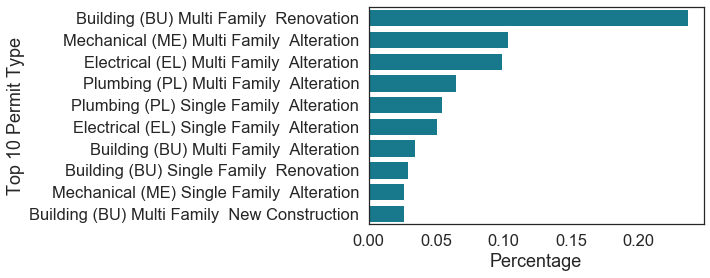

In [208]:
sns.set(font_scale = 1.5)
sns.set_style("white")

ax = sns.barplot(x='Percentage', y='Permit_Type', data=permit_type_plot,color='#04879E')
ax.set_xlabel('Percentage')
# ax.set_yticks(size=12)
ax.set_ylabel('Top 10 Permit Type')
# plt.tight_layout()
ax.get_figure().savefig("../figures/top_10_permit.png", bbox_inches = "tight", dpi=500)

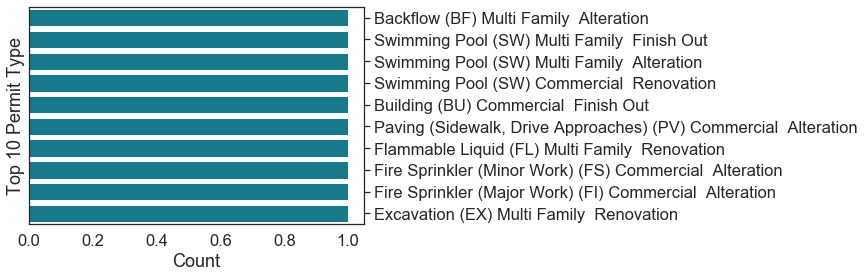

In [207]:
sns.set(font_scale = 1.5)
sns.set_style("white")

ax = sns.barplot(x='Count', y='Permit_Type', data=permit_type.sort_values('Count').iloc[:10],color='#04879E')
# ax.set_xlabel('Percentage')
# ax.set_yticks(size=12)
ax.set_ylabel('Top 10 Permit Type')
ax.yaxis.tick_right()
ax.get_figure().savefig("../figures/once_permit.png", bbox_inches = "tight", dpi=500)

merge eviction with previous-year permits

In [133]:
df_mg_prev_year = df_all.merge(add_permit_till_2019_grp[['tract','treatedDfAddress','Year_permit_next_y']].drop_duplicates(),
                               left_on=['Address_merge','Year_Filed'],
                               right_on=['treatedDfAddress','Year_permit_next_y'],how='left').rename(
        columns = {'treatedDfAddress_y':'treatedDfAddress_permit'})

In [158]:
df_mg_prev_year[df_mg_prev_year.treatedDfAddress_permit.notnull()].shape[0]/df_mg.shape[0]

0.08447130886559591

With 2020

In [30]:
df_mg_prev_year_2020.head()

,p.name,d.address,d.city,d.state,d.zip,case,court,date.filed,year.filed,month.filed,...,d.white.perc,d.black.perc,d.hisp.perc,d.asian.perc,d.other.perc,p.clean.name,Address_merge,tract_y,treatedDfAddress,Year_permit_next_y
0,7481.0,2321 beatrice street,dallas,TX,75208,1951829P,52,190506,19,5,...,0.154550,0.157473,0.622343,0.043234,0.022399,NaN,2321 beatrice street,NaN,NaN,NaN
1,7796.0,116 east mimosa lane,mesquite,TX,75149,1800587D,21,180409,18,4,...,0.544564,0.165324,0.084208,0.161289,0.044615,NaN,116 east mimosa lane,NaN,NaN,NaN
2,5309.0,1919 billie drive house,dallas,TX,75232,2050672P,52,200207,20,2,...,0.053344,0.889651,0.023956,0.003056,0.029993,NaN,1919 billie drive house,NaN,NaN,NaN
3,7239.0,1700 west polo road suite 114,grand prairie,TX,75052,1801436G,41,180612,18,6,...,0.529565,0.148213,0.101105,0.181662,0.039455,NaN,1700 west polo road suite,NaN,NaN,NaN
4,886.0,650 south walton walker boulevard,dallas,TX,75211,1850858P,52,180227,18,2,...,0.142224,0.292210,0.461607,0.074783,0.029175,NaN,650 south walton walker boulevard,NaN,NaN,NaN


## Same year

In [159]:
df_mg_same_year = df_all.merge(add_permit_till_2019_grp[['tract','treatedDfAddress','Year_permit']].drop_duplicates(),
                               left_on=['Address_merge','Year_Filed'],
                               right_on=['treatedDfAddress','Year_permit'],how='left').rename(
        columns = {'treatedDfAddress_y':'treatedDfAddress_permit'})

In [160]:
df_mg_same_year[df_mg_same_year.treatedDfAddress_permit.notnull()].shape[0]/df_mg.shape[0]

0.11670524496376336

## 2.2 Tract level

In [13]:
g_cols = ['tract','Year_permit','Year_permit_next_y','Permit_count']
add_permit_tract = add_permit_grp[g_cols].groupby(['tract','Year_permit','Year_permit_next_y']).sum().reset_index()


In [14]:
add_permit_tract.head()

,tract,Year_permit,Year_permit_next_y,Permit_count
0,4.811300e+10,16,17,353
1,4.811300e+10,17,18,337
2,4.811300e+10,18,19,272
3,4.811300e+10,19,20,118
4,4.811300e+10,20,21,20


#### Panel

In [2]:
df_panel = pd.read_csv('../data/clean/evictions_panel.csv')

In [55]:
df_panel.columns

Index(['Unnamed: 0', 'tract', 'year', 'judgements', 'evictions', 'amount',
       'evicted_white', 'evicted_black', 'evicted_hisp', 'evicted_asian',
       'evicted_other', 'total_pop', 'white_pop', 'black_pop', 'native_pop',
       'asian_pop', 'pacific_pop', 'other_pop', 'two_race_pop', 'tot_housing',
       'rental_vacancy', 'median_rent', 'owner_occ', 'renter_occ',
       'perc_rent_gt_35', 'single_fathers', 'single_mothers',
       'perc_snap_benefits', 'perc_poverty_line', 'unemployment_rate',
       'perc_insured', 'median_income', 'evictions_pc', 'evictions_pu',
       'perc_rental'],
      dtype='object')

Add permits

In [17]:
add_permit_tract['tract'] = add_permit_tract.tract.astype(int)

In [18]:
df_panel['year_two_d'] = df_panel['year'].apply(lambda x: int(str(x)[2:4]))

In [16]:
# add_permit_tract.drop(columns='Year_permit_next_y').to_csv('../data/clean/permits_tract.csv',index=False)
add_permit_tract.to_csv('../data/clean/add_permit_tract.csv',index=False)

In [19]:
# df_panel_permits = df_panel.merge(add_permit_tract[['tract','Year_permit_next_y','Permit_count']],
#                                left_on=['tract','year_two_d'],
#                                right_on=['tract','Year_permit_next_y'],how='left').rename(
#         columns = {'Permit_count':'Permit_count_prev_year'})

In [20]:
df_panel_permits = df_panel_permits.merge(add_permit_tract[['tract','Year_permit','Permit_count']],
                               left_on=['tract','year_two_d'],
                               right_on=['tract','Year_permit'],how='left').rename(
        columns = {'Permit_count':'Permit_count_this_year'}
        ).drop(columns = ['Year_permit_next_y','Year_permit','year_two_d'])

In [21]:
df_panel_permits.head()

,Unnamed: 0,tract,year,judgements,evictions,amount,evicted_white,evicted_black,evicted_hisp,evicted_asian,...,perc_snap_benefits,perc_poverty_line,unemployment_rate,perc_insured,median_income,evictions_pc,evictions_pu,perc_rental,Permit_count_prev_year,Permit_count_this_year
0,1,48113000100,2017,31,31,1812.308421,26.076330,0.664677,3.322692,0.337228,...,1.6,NaN,4.4,94.8,97679,0.007846,0.047988,0.352428,353.0,337.0
1,2,48113000100,2018,15,19,2028.928333,13.616015,2.497810,1.587126,0.861060,...,1.0,NaN,3.8,94.7,103214,0.004656,0.026648,0.376850,337.0,272.0
2,3,48113000100,2019,13,17,1818.310000,14.081011,0.712082,1.777414,0.028224,...,0.5,1.2,3.7,96.9,112368,0.004141,0.025148,0.360341,272.0,118.0
3,4,48113000100,2020,14,14,1199.708182,9.647780,2.185291,1.625310,0.146603,...,0.5,1.2,2.4,97.6,114306,0.003556,0.017722,0.427258,118.0,20.0
4,5,48113000201,2017,2,2,1964.755000,1.938821,0.012981,0.006560,0.008454,...,0.4,NaN,1.7,88.4,89605,0.000688,0.005587,0.252468,270.0,216.0


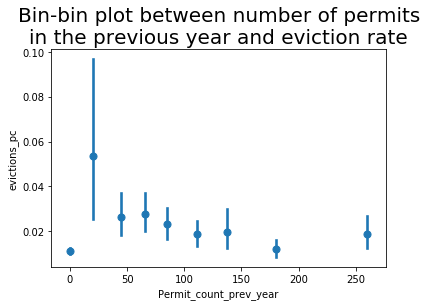

In [139]:
## df_2017 is generated in the correlational analysis part
ax = sns.regplot(x='Permit_count_prev_year',y='evictions_pc',data = df_2017,x_bins=15,fit_reg=False)
ax.set_title('Bin-bin plot between number of permits\nin the previous year and eviction rate',size=20)
ax.get_figure().savefig("../figures/bin_bin_permits.png",dpi = 500, bbox_inches = 'tight')

Add mobility

In [22]:
mob = pd.read_csv('../data/clean/mobility_tract_level.csv',sep=';')

In [23]:
mob['tract_level_mobility_rate'] = mob['mobile_students_numer']/mob['all_students']

In [24]:
mob['mobility_rate'] = mob['mobile_students_numer']/mob['mobile_students__denom']

In [25]:
mob.rename(columns={'tractid':'tract'},inplace=True)

In [26]:
df_tract = df_panel_permits.merge(mob[['tract','mobility_rate']],how='left',on='tract')

In [4]:
df_tract.to_csv('../data/clean/tract_level_all_panel.csv',index=False)

#### Appendix: address level Permits data additionals

In [37]:
g_cols = ['tract','Year_permit','Year_permit_next_y','Permit_count']
add_permit_tract = add_permit_grp[g_cols].groupby(['tract','Year_permit','Year_permit_next_y']).sum().reset_index()


In [49]:
df_mg_prev_year_2020 = df_all.merge(add_permit_tract[['tract','Year_permit_next_y','Permit_count']].drop_duplicates(),
                               left_on=['full_tract','year.filed'],
                               right_on=['tract','Year_permit_next_y'],how='left').rename(
        columns = {'treatedDfAddress_y':'treatedDfAddress_permit','Permit_count':'Permit_count_prev_year'})

In [50]:
df_mg_prev_year_2020 = df_mg_prev_year_2020.merge(add_permit_tract[['tract','Year_permit','Permit_count']].drop_duplicates(),
                               left_on=['full_tract','year.filed'],
                               right_on=['tract','Year_permit'],how='left').rename(
        columns = {'treatedDfAddress_y':'treatedDfAddress_permit','Permit_count':'Permit_count_this_year'}
        ).drop(columns = ['tract_y','tract_x','Year_permit_next_y','Year_permit'])

In [51]:
df_mg_prev_year_2020.columns

Index(['p.name', 'd.address', 'd.city', 'd.state', 'd.zip', 'case', 'court',
       'date.filed', 'year.filed', 'month.filed', 'day.filed', 'p.x', 'p.y',
       'p.namegroup', 'p.num', 'p.street', 'p.apt', 'p.address', 'p.city',
       'p.state', 'p.zip', 'd.x', 'd.y', 'd.name', 'd.num', 'd.street',
       'd.apt', 'judgement1', 'judgement2', 'judgement.amt', 'county',
       'state_fips', 'd.white.perc', 'd.black.perc', 'd.hisp.perc',
       'd.asian.perc', 'd.other.perc', 'p.clean.name', 'full_tract', 'd.x.1',
       'd.y.1', 'optional', 'Permit_count_prev_year', 'tract',
       'Permit_count_this_year'],
      dtype='object')

In [37]:
df_all.tract = df_all.tract.astype(float)

In [39]:
df_mg_prev_year_2020.head()

,p.name,d.address,d.city,d.state,d.zip,case,court,date.filed,year.filed,month.filed,...,state_fips,d.white.perc,d.black.perc,d.hisp.perc,d.asian.perc,d.other.perc,p.clean.name,Address_merge,Year_permit_next_y,Permit_count
0,7481.0,2321 beatrice street,dallas,TX,75208,1951829P,52,190506,19,5,...,48,0.154550,0.157473,0.622343,0.043234,0.022399,NaN,2321 beatrice street,NaN,NaN
1,7796.0,116 east mimosa lane,mesquite,TX,75149,1800587D,21,180409,18,4,...,48,0.544564,0.165324,0.084208,0.161289,0.044615,NaN,116 east mimosa lane,NaN,NaN
2,5309.0,1919 billie drive house,dallas,TX,75232,2050672P,52,200207,20,2,...,48,0.053344,0.889651,0.023956,0.003056,0.029993,NaN,1919 billie drive house,NaN,NaN
3,7239.0,1700 west polo road suite 114,grand prairie,TX,75052,1801436G,41,180612,18,6,...,48,0.529565,0.148213,0.101105,0.181662,0.039455,NaN,1700 west polo road suite,NaN,NaN
4,886.0,650 south walton walker boulevard,dallas,TX,75211,1850858P,52,180227,18,2,...,48,0.142224,0.292210,0.461607,0.074783,0.029175,NaN,650 south walton walker boulevard,NaN,NaN


In [209]:
1/total

0.00018789928598271326

In [116]:
# df_mg[(df_mg.year_diff.isin([0,1]))&df_mg.treatedDfAddress_permit.notnull()].shape[0]/df_mg.shape[0]

0.3997056323195412

In [117]:
df_mg[(df_mg.year_diff.isin([0]))&df_mg.treatedDfAddress_permit.notnull()].shape[0]/df_mg.shape[0]

0.237460824990801

In [118]:
df_mg[(df_mg.year_diff.isin([1]))&df_mg.treatedDfAddress_permit.notnull()].shape[0]/df_mg.shape[0]

0.1622448073287402

In [139]:
df_mg.shape[0]

98933

In [138]:
df_all.shape[0]

98933

In [102]:
df_mg[(df_mg.Year_Filed == df_mg.Year_permit)&df_mg.treatedDfAddress_permit.notnull()].shape[0]/df_mg.shape[0]

0.24214758843068315

In [84]:
df_mg_matched = df_mg[df_mg.treatedDfAddress_permit.notnull()]

In [81]:
add_permit[add_permit.treatedDfAddress=='10550 north central expy']

,tract,Contractor,Y,Address,PermitYear,Zip_Code,PermitDate,Score,Status,Permit_Type,...,PermitNum,Area,Work_Description,X,Value,originalDfAddress,dfStreetNumber,dfStreetName,dfApartmentNumber,treatedDfAddress
25547,4.811301e+10,PROFESSIONAL SIGN SYSTEMS CO INC dba ID SOLUTI...,7.011109e+06,10550 n central expy,2017,75231.0,2017/06/27 00:00:00,90.92,T,Electrical Sign (ES) New Construction,...,1706276015,9.0,ERECT ATTACHED SIGN,2.499674e+06,NaN,10550 north central expy,10550,north central expy,NaN,10550 north central expy
44245,4.811301e+10,CORNERSTON SECURITY (817) 521-0287 2100 N HWY ...,7.011109e+06,10550 n central expy,2017,75231.0,2017/04/05 00:00:00,90.92,T,Security System (SE) Multi Family Alteration,...,1701061030,NaN,INSTALLATION OF SECURITY SYSTEM,2.499674e+06,60000.0,10550 north central expy,10550,north central expy,NaN,10550 north central expy
44827,4.811301e+10,CLP MANAGEMENT (214) 982-1690 5842 GROSSETO DR...,7.011109e+06,10550 n central expy,2017,75231.0,2017/04/06 00:00:00,90.92,T,Swimming Pool (SW) Multi Family Renovation,...,1701131151,1870.0,"INSTALL SWIMMING POOL, FOUNTAIN AND DECKING.",2.499674e+06,49000.0,10550 north central expy,10550,north central expy,NaN,10550 north central expy
82368,4.811301e+10,"PLUMBING PLUS 1506 FM 985 , ENNIS, TX 75119 (2...",7.011109e+06,10550 n central expy,2018,75231.0,2018/09/18 00:00:00,90.92,T,Plumbing (PL) Multi Family Alteration,...,1809181033,NaN,INSTALL WATER LINE FOR IRRIGATION METER,2.499674e+06,1000.0,10550 north central expy,10550,north central expy,NaN,10550 north central expy
